# Classfy 50 Cars Brand by YOLO


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d saurabhsawhney/stanford-cars-augmented-balanced
!unzip stanford-cars-augmented-balanced.zip

Streaming output truncated to the last 5000 lines.
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercedes-Benz C-Class Sedan 2012/Val_02_06543.jpg  
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercedes-Benz C-Class Sedan 2012/Val_02_06861.jpg  
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercedes-Benz C-Class Sedan 2012/Val_02_08000.jpg  
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercedes-Benz C-Class Sedan 2012/Val_02_08009.jpg  
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercedes-Benz C-Class Sedan 2012/Val_03_00447.jpg  
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercedes-Benz C-Class Sedan 2012/Val_03_00519.jpg  
  inflating: Augmented_Balanced_Stanford_Car_Images_Uncropped/Validation_Augmented_Images/Mercede

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

def split_and_convert_to_yolo_format(src_folder, dest_folder, train_size=0.8, val_size=0.1):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # معالجة كل فئة على حدة
    for class_folder in os.listdir(src_folder):
        class_folder_path = os.path.join(src_folder, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        # إنشاء مجلدات المخرجات
        train_folder = os.path.join(dest_folder, 'train', class_folder)
        val_folder = os.path.join(dest_folder, 'val', class_folder)
        test_folder = os.path.join(dest_folder, 'test', class_folder)

        for folder in [train_folder, val_folder, test_folder]:
            if not os.path.exists(folder):
                os.makedirs(folder)

        img_files = [f for f in os.listdir(class_folder_path) if f.endswith('.jpeg') or f.endswith('.jpg')]
        train_files, temp_files = train_test_split(img_files, train_size=train_size, shuffle=True)
        val_files, test_files = train_test_split(temp_files, test_size=val_size / (1 - train_size), shuffle=True)

        # نقل الملفات إلى المجلدات المناسبة
        for f in train_files:
            shutil.copy(os.path.join(class_folder_path, f), os.path.join(train_folder, f))
            convert_image_to_yolo_format(os.path.join(train_folder, f), os.path.join(train_folder, f))
        for f in val_files:
            shutil.copy(os.path.join(class_folder_path, f), os.path.join(val_folder, f))
            convert_image_to_yolo_format(os.path.join(val_folder, f), os.path.join(val_folder, f))
        for f in test_files:
            shutil.copy(os.path.join(class_folder_path, f), os.path.join(test_folder, f))
            convert_image_to_yolo_format(os.path.join(test_folder, f), os.path.join(test_folder, f))

def convert_image_to_yolo_format(img_path, output_path):
    img = Image.open(img_path)
    width, height = img.size

    # إنشاء ملف .txt المقابل
    txt_file = os.path.splitext(os.path.basename(img_path))[0] + '.txt'
    txt_path = os.path.join(os.path.dirname(output_path), txt_file)

    # كتابة بيانات المربعات المحيطة (تعديل البيانات وفقًا للتسميات الفعلية)
    with open(txt_path, 'w') as f:
        # بيانات تجريبية: center_x center_y width height
        f.write(f'0 0.5 0.5 1.0 1.0\n')

    # (اختياري) يمكنك نقل الصورة نفسها إلى المجلد الصحيح إذا لزم الأمر

src_folder = '/content/imgs_zip/imgs'
dest_folder = '/content/split_data'
split_and_convert_to_yolo_format(src_folder, dest_folder)

In [ ]:
import os
import yaml

def create_yaml_file(output_folder, num_classes, names):
    # تحديد مسارات البيانات
    yaml_content = {
        'train': os.path.join(output_folder, 'train'),
        'val': os.path.join(output_folder, 'val'),
        'test': os.path.join(output_folder, 'test'),
        'nc': num_classes,  # عدد الفئات
        'names': names  # أسماء الفئات
    }

    yaml_file_path = os.path.join(output_folder, 'data.yaml')

    # كتابة محتوى YAML إلى ملف
    with open(yaml_file_path, 'w') as yaml_file:
        yaml.dump(yaml_content, yaml_file, default_flow_style=False)

# تعريف عدد الفئات وأسمائها
num_classes = 50
names = [
    'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Bugatti',
    'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Citroen', 'Daewoo', 'Dodge',
    'Ferrari', 'Fiat', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hudson', 'Hyundai',
    'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MG',
    'Maserati', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
    'Oldsmobile', 'Peugeot', 'Pontiac', 'Porsche', 'Ram Trucks', 'Renault',
    'Saab', 'Studebaker', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'
]

output_folder = 'split_data'  # المجلد الذي يحتوي على مجموعات البيانات المقسمة

create_yaml_file(output_folder, num_classes, names)

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 84.3 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
results = model.train(data='/content/split_data/data.yaml', epochs=20, imgsz=640, device=0)

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/split_data/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/split_data/train/Acura.cache... 3658 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3658/3658 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/split_data/val/Acura.cache... 432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 432/432 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000185, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.74G     0.3608      3.282      1.083         33        640: 100%|██████████| 229/229 [01:18<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        432        432      0.988      0.983      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.23G       0.16      1.782     0.9329         34        640: 100%|██████████| 229/229 [01:08<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.08it/s]

                   all        432        432      0.997          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.23G     0.1903      1.175     0.9704         32        640: 100%|██████████| 229/229 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.87it/s]

                   all        432        432      0.995          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.23G     0.1903     0.7425     0.9997         29        640: 100%|██████████| 229/229 [01:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.23G     0.1532     0.5582      0.962         36        640: 100%|██████████| 229/229 [01:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.21it/s]

                   all        432        432      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.23G     0.1295     0.4502     0.9339         33        640: 100%|██████████| 229/229 [01:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.24G     0.1136      0.384     0.9161         33        640: 100%|██████████| 229/229 [01:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]

                   all        432        432      0.995      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.23G     0.1071     0.3526     0.9106         30        640: 100%|██████████| 229/229 [01:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.76it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.23G    0.09705     0.3226     0.8997         32        640: 100%|██████████| 229/229 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.01it/s]

                   all        432        432      0.997          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.23G    0.08979     0.2953     0.8901         33        640: 100%|██████████| 229/229 [01:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        432        432          1          1      0.995      0.994


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.56G    0.07625     0.4123     0.8644         10        640: 100%|██████████| 229/229 [01:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.23G    0.05792     0.2863     0.8538         10        640: 100%|██████████| 229/229 [01:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.23G    0.05264     0.2494     0.8516         10        640: 100%|██████████| 229/229 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.24G    0.04599     0.2197     0.8499         10        640: 100%|██████████| 229/229 [01:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.24G    0.04438     0.2016      0.844         10        640: 100%|██████████| 229/229 [01:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.75it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.23G    0.04254     0.1917     0.8468         10        640: 100%|██████████| 229/229 [01:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.38it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.23G    0.03982     0.1807     0.8438         10        640: 100%|██████████| 229/229 [01:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.09it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.23G    0.03774     0.1695     0.8499         10        640: 100%|██████████| 229/229 [01:00<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.25it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.23G    0.03484     0.1597     0.8437         10        640: 100%|██████████| 229/229 [01:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        432        432          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.23G    0.03224     0.1534     0.8434         10        640: 100%|██████████| 229/229 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        432        432          1          1      0.995      0.995



20 epochs completed in 0.388 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,015,398 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]


                   all        432        432          1          1      0.995      0.995
                 Acura        432        432          1          1      0.995      0.995
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
model.export(format='tflite')

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,015,398 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 54, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 275.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 283.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 301.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 329.3 MB/s 

100%|██████████| 1.11M/1.11M [00:00<00:00, 31.2MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 45.78file/s]


ONNX: starting export with onnx 1.16.2 opset 17...


ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 1.3s, saved as 'runs/detect/train2/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 36.7s, saved as 'runs/detect/train2/weights/best_saved_model' (29.6 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/train2/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (38.7s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=640 data=/content/split_data/data.yaml  
Visualize:       https://netron.app


'runs/detect/train2/weights/best_saved_model/best_float32.tflite'

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,015,398 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/split_data/val/Acura.cache... 432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 432/432 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.37it/s]


                   all        432        432          1          1      0.995      0.995
                 Acura        432        432          1          1      0.995      0.995
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train22


array([      0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,
             0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,       0.995,
             0.995,       0.995])

In [ ]:
import matplotlib.pyplot as plt

# Access the results dictionary
metrics = model.val()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(metrics['train/box_loss'], label='Training Box Loss')
plt.plot(metrics['train/obj_loss'], label='Training Objectness Loss')
plt.plot(metrics['train/cls_loss'], label='Training Classification Loss')
plt.plot(metrics['val/box_loss'], label='Validation Box Loss')
plt.plot(metrics['val/obj_loss'], label='Validation Objectness Loss')
plt.plot(metrics['val/cls_loss'], label='Validation Classification Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot mAP
plt.figure(figsize=(10, 5))
plt.plot(metrics['val/metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(metrics['val/metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.title('Mean Average Precision (mAP) over Epochs')
plt.legend()
plt.show()


In [ ]:
# Prediction using custom tflite model

#  Prediction using trained model

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('runs\\detect\\train3\\weights\\best_saved_model\\best_float32.tflite')

# Run inference
model.predict('test_images', save=True, imgsz=640, conf=0.2)

In [ ]:
from ultralytics import YOLO

# Load a model
# Verify that the path to the model is correct and the file exists.
model = YOLO("/content/best.pt")  # load a custom trained model

# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 33, 8400) (5.9 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 164.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 221.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 231.1 MB/s eta 0:00:00
   ━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 90.0MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 33.46file/s]



ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 2.3s, saved as '/content/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 51.7s, saved as '/content/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (55.1s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/content/best_saved_model/best_float32.tflite imgsz=640 data=data/data.yaml  
Visualize:       https://netron.app


'/content/best_saved_model/best_float32.tflite'

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1Nf4yVn1RzoCSev8CQeU27szYYk8KWFNE


Downloading...
From (original): https://drive.google.com/uc?id=1Nf4yVn1RzoCSev8CQeU27szYYk8KWFNE
From (redirected): https://drive.google.com/uc?id=1Nf4yVn1RzoCSev8CQeU27szYYk8KWFNE&confirm=t&uuid=59020020-c449-4894-ab33-734bb316777a
To: /content/yolo-obj_final.weights
100% 256M/256M [00:12<00:00, 21.0MB/s]


In [ ]:
!gdown https://github.com/nerminnuraydogan/car-brand-detection/blob/main/cfg/yolo-obj.cfg

Downloading...
From: https://github.com/nerminnuraydogan/car-brand-detection/blob/main/cfg/yolo-obj.cfg
To: /content/yolo-obj.cfg
213kB [00:00, 8.16MB/s]


In [ ]:
!gdown https://github.com/nerminnuraydogan/car-brand-detection/blob/main/helper.py

Downloading...
From: https://github.com/nerminnuraydogan/car-brand-detection/blob/main/helper.py
To: /content/helper.py
329kB [00:00, 5.39MB/s]


In [ ]:
!gdown https://github.com/nerminnuraydogan/car-brand-detection/blob/main/data/obj.names

Downloading...
From: https://github.com/nerminnuraydogan/car-brand-detection/blob/main/data/obj.names
To: /content/obj.names
169kB [00:00, 5.95MB/s]


In [ ]:
!git clone https://github.com/nerminnuraydogan/car-brand-detection.git

Cloning into 'car-brand-detection'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36 (from 1)
Receiving objects: 100% (36/36), 1.66 MiB | 1.97 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
!gdown https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/

Time took: 5.31s


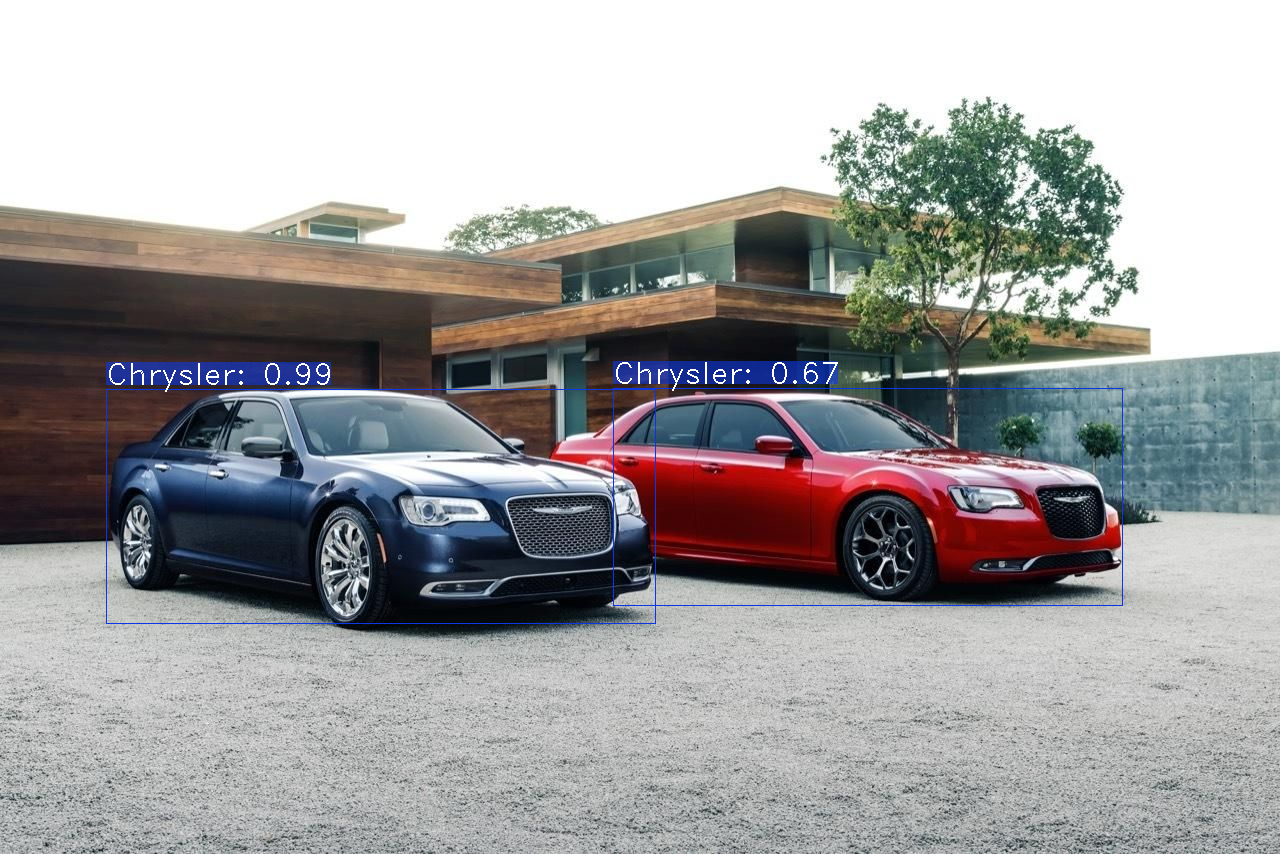

NameError: name 'cv2_imwrite' is not defined

In [ ]:
import cv2
import numpy as np

import time
import sys
import os

# adapted from https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/


# Minimum probability to filter weak detections.
# a default value of 50% (0.5 ),
# you should feel free to experiment with this value.
CONFIDENCE = 0.5

# non-maxima suppression threshold with a default value of 0.5 .
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5

# the neural network configuration
config_path = "/content/car-brand-detection/cfg/yolo-obj.cfg"

# the YOLO net weights file
weights_path = "/content/yolo-obj_final.weights"

# loading all the class labels (objects)
LABELS = open("/content/car-brand-detection/data/obj.names").read().strip().split("\n")

# generating colors for each object for later plotting
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

# load the YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)


# path name to the image
path_name = "/content/car-brand-detection/data/chrysler.jpg"

# arrange filenames to later save the deteceted object image
# jfif extension may cause problems, try jpg format
file_name = os.path.basename(path_name)
filename, ext = file_name.split(".")

# load the input image and get its spatial dimensions
image = cv2.imread(path_name)
h, w = image.shape[:2]

# 4D blob
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving the our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# sets the blob as the input of the network
net.setInput(blob)

# get all the layer names
ln = net.getLayerNames()

# determine only the *output* layer names that we need from YOLO to detect
# determine only the *output* layer names that we need from YOLO
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]



# feed forward (inference) and get the network output
# measure how much it took in seconds
start = time.perf_counter()
layer_outputs = net.forward(ln)
time_took = time.perf_counter() - start
print(f"Time took: {time_took:.2f}s")

# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes, confidences, class_ids = [], [], []


# boxes : The bounding boxes around the object.
# confidences : The confidence value that YOLO assigns to an object.
# classIDs : The detected object’s class label.

# Lower confidence values indicate that the object might not be what the network thinks it is.
# Remember from the constans above that it will filter out the objects that don’t meet the 0.5 threshold.


# loop over each of the layer outputs
for output in layer_outputs:

    # loop over each of the object detections
    for detection in output:
        # extract the class id (label) and confidence (as a probability) of
        # the current object detection
        scores = detection[5:]
        class_id = np.argmax(scores)    # the most probable class id
        confidence = scores[class_id]

        # discard weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > CONFIDENCE:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")

            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)



# Applying non-maxima suppression suppresses significantly overlapping bounding boxes,
# keeping only the most confident ones.

# perform the non maximum suppression given the scores defined before
idxs = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)

# define visual content values for drawing bounding box around the detected object
font_scale = 1
font_thickness = 1
font_color = (255, 255, 255)

thickness = 1

# ensure at least one detection exists
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        x, y = boxes[i][0], boxes[i][1]
        w, h = boxes[i][2], boxes[i][3]

        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[class_ids[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness=thickness)
        text = f"{LABELS[class_ids[i]]}: {confidences[i]:.2f}"
        # calculate text width & height to draw the transparent boxes as background of the text
        (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
        text_offset_x = x
        text_offset_y = y - 5
        box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
        overlay = image.copy()
        cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)

        # add opacity (transparency to the box)
        image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
        # now put the text (label: confidence %)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_DUPLEX,
            fontScale=font_scale, color=font_color, thickness=font_thickness)

# display image
cv2_imshow( image)
if cv2.waitKey(0) == ord("q"):
    pass

# save to a file
cv2_imwrite(image)


For example, here we download and display a PNG image of the Colab logo:

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from yolov4.tf import YOLOv4

# Initialize the YOLOv4 model
yolo = YOLOv4()

# Load Darknet weights
yolo.classes = "obj.names"
yolo.make_model()
yolo.load_weights("yolo-obj_final.weights", weights_type="yolo")

# Save as a TensorFlow SavedModel
yolo.save_as_saved_model("/content/yolo_saved_model")


ModuleNotFoundError: No module named 'yolov4'

In [ ]:
import tensorflow as tf

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("/content/yolo_saved_model")
tflite_model = converter.convert()

# Save the TFLite model
with open("/content/yolo_model.tflite", "wb") as f:
    f.write(tflite_model)
